# Bibliotecas Gráficas

# Matplotlib e Seaborn: Comparativo entre Bibliotecas de Visualização em Python

A visualização de dados é uma etapa fundamental na análise exploratória e na comunicação de resultados. No ecossistema Python, duas bibliotecas se destacam para esse propósito: **Matplotlib** e **Seaborn**.

## 📊 Matplotlib

**Matplotlib** é a biblioteca de visualização mais antiga e robusta do Python. Ela permite criar gráficos estáticos, animados e interativos com grande controle sobre todos os elementos da figura.

### ✅ Vantagens
- **Flexibilidade**: controle total sobre cada elemento do gráfico (títulos, eixos, cores, tamanhos, etc.).
- **Ampla documentação**: muitos tutoriais e exemplos disponíveis.
- **Alta personalização**: ideal para gráficos científicos complexos.

### ❌ Desvantagens
- **Sintaxe verbosa**: criar gráficos simples pode exigir muito código.
- **Estética padrão**: os gráficos gerados por padrão são mais simples e menos atrativos visualmente.

## 🎨 Seaborn
Seaborn é uma biblioteca baseada em Matplotlib, projetada para tornar a criação de gráficos estatísticos mais simples e bonita. Ela é altamente integrada com o Pandas.

### ✅ Vantagens
- Estética aprimorada: os gráficos têm aparência mais profissional por padrão.

- Menos código: sintaxe mais enxuta para criar visualizações estatísticas.

- Suporte nativo a DataFrames do Pandas: facilita a manipulação e visualização dos dados.

- Funções estatísticas: como boxplot, violinplot, pairplot, entre outras.

### ❌ Desvantagens
- Menor flexibilidade que o Matplotlib para personalizações extremas.

- Dependência do Pandas: menos útil se os dados não estiverem em DataFrames.





| Característica             | Matplotlib               | Seaborn                  |
|---------------------------|--------------------------|--------------------------|
| Facilidade de uso         | Média                    | Alta                     |
| Estética dos gráficos     | Simples (por padrão)     | Agradável e moderna      |
| Flexibilidade             | Muito alta               | Média                    |
| Personalização            | Completa                 | Limitada                 |
| Integração com Pandas     | Boa                      | Excelente                |
| Gráficos estatísticos     | Requer mais código       | Prontos para uso         |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração geral para melhorar a visualização dos gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

# Criando dados de exemplo
np.random.seed(42)
dados = pd.DataFrame({
    'Categoria': np.random.choice(['A', 'B', 'C', 'D'], 200),
    'Valor': np.random.normal(100, 20, 200),
    'Valor2': np.random.normal(50, 10, 200),
    'Grupo': np.random.choice(['X', 'Y'], 200)
})

# Dados para gráfico de dispersão com linha de tendência
x = np.linspace(0, 10, 30)
y = 2 * x + 1 + np.random.normal(0, 2, 30)

## 1. Gráfico de Dispersão com Linha de Tendência

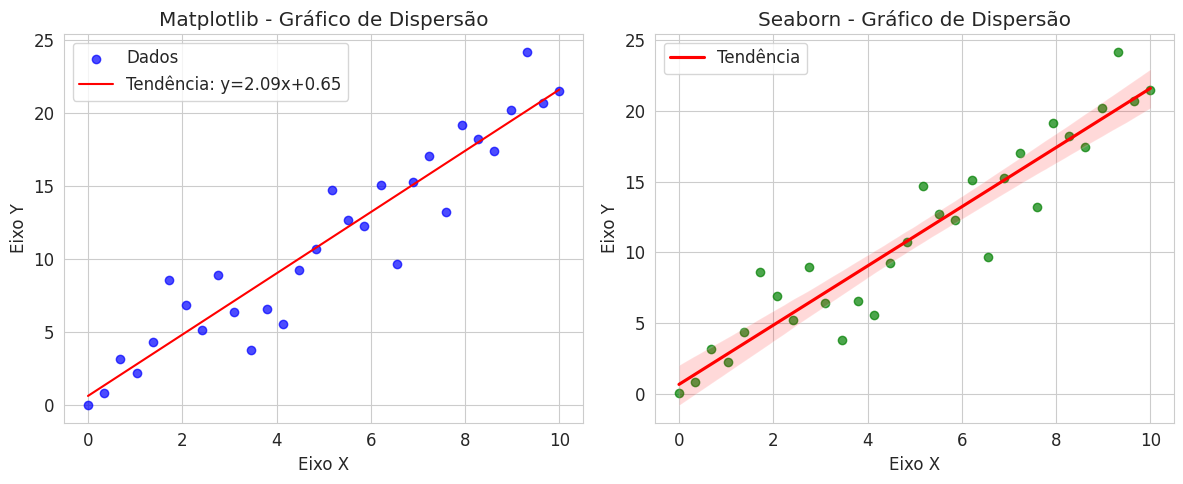

In [2]:
# Matplotlib
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', alpha=0.7, label='Dados')
# Linha de tendência com numpy.polyfit
coef = np.polyfit(x, y, 1)
trend_line = np.poly1d(coef)
plt.plot(x, trend_line(x), color='red', label=f'Tendência: y={coef[0]:.2f}x+{coef[1]:.2f}')
plt.title('Matplotlib - Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)

# Seaborn
plt.subplot(1, 2, 2)
sns.regplot(x=x, y=y, color='green', scatter_kws={'alpha':0.7},
            line_kws={'color':'red', 'label':'Tendência'})
plt.title('Seaborn - Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.tight_layout()
plt.show()

**Observações:**
- Em Matplotlib, precisamos calcular manualmente a linha de tendência usando `polyfit`
- Seaborn oferece `regplot` que já inclui a linha de regressão e intervalo de confiança por padrão
- Seaborn também formata automaticamente melhor o gráfico

## 2. Gráficos de Barras e Colunas

<ipython-input-3-45f53be6ec10>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Categoria', y='Valor', data=dados_agg, palette='viridis', ci=None)
<ipython-input-3-45f53be6ec10>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Valor', data=dados_agg, palette='viridis', ci=None)


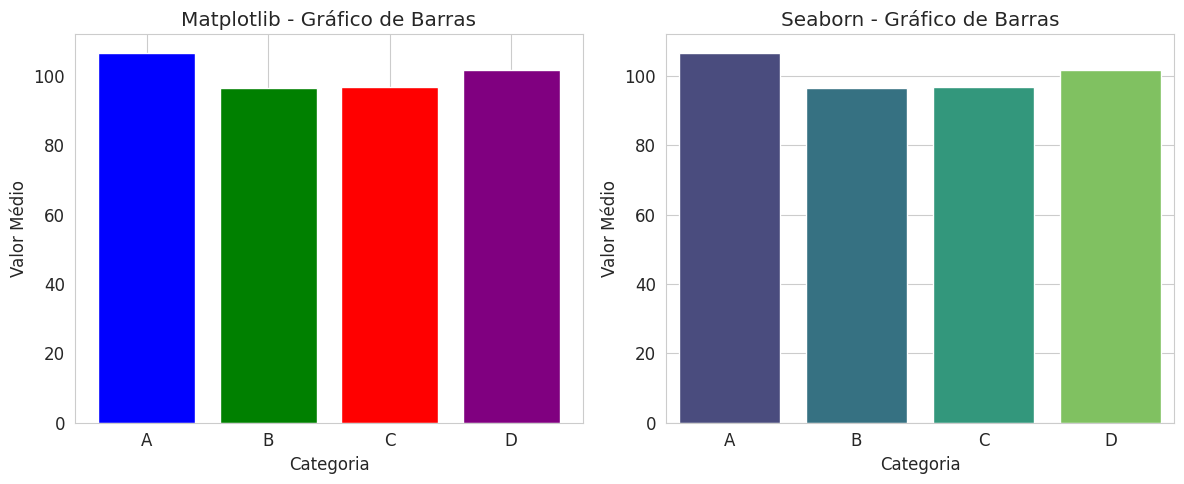

In [3]:
# Agregando dados para o gráfico de barras
dados_agg = dados.groupby('Categoria')['Valor'].mean().reset_index()

plt.figure(figsize=(12, 5))

# Matplotlib - Gráfico de Barras
plt.subplot(1, 2, 1)
plt.bar(dados_agg['Categoria'], dados_agg['Valor'], color=['blue', 'green', 'red', 'purple'])
plt.title('Matplotlib - Gráfico de Barras')
plt.xlabel('Categoria')
plt.ylabel('Valor Médio')
plt.grid(axis='y')

# Seaborn - Gráfico de Barras
plt.subplot(1, 2, 2)
sns.barplot(x='Categoria', y='Valor', data=dados_agg, palette='viridis', ci=None)
plt.title('Seaborn - Gráfico de Barras')
plt.xlabel('Categoria')
plt.ylabel('Valor Médio')
plt.tight_layout()
plt.show()

**Observações:**
- Seaborn calcula automaticamente as médias (podemos desativar com `ci=None`)
- Seaborn oferece paletas de cores mais sofisticadas
- Seaborn adiciona automaticamente barras de erro (que podemos remover)

## 3. Gráfico de Setor (Pizza)

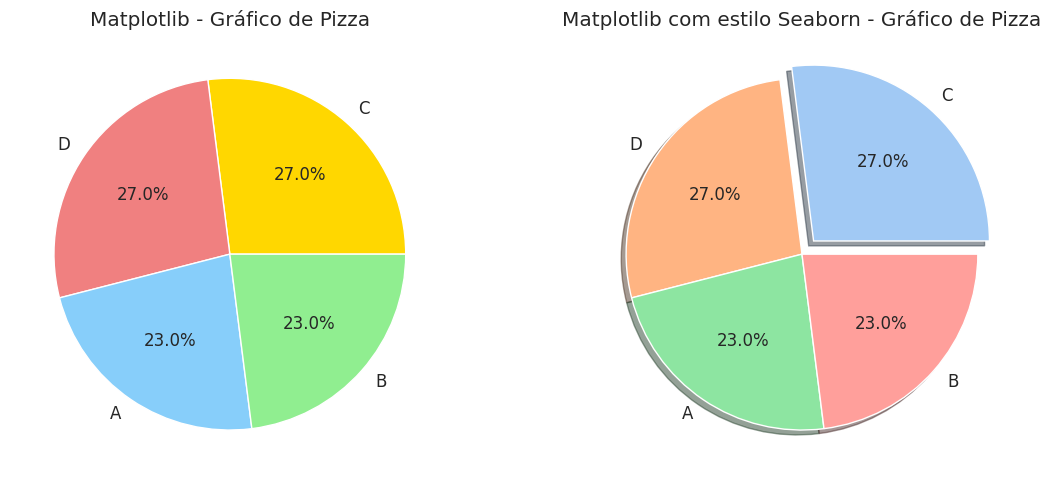

In [4]:
plt.figure(figsize=(12, 5))

# Matplotlib - Gráfico de Pizza
plt.subplot(1, 2, 1)
counts = dados['Categoria'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Matplotlib - Gráfico de Pizza')

# Seaborn não tem função específica para gráfico de pizza, usamos Matplotlib
# Mas podemos melhorar a apresentação
plt.subplot(1, 2, 2)
explode = (0.1, 0, 0, 0)  # Destaque para a primeira fatia
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), explode=explode, shadow=True)
plt.title('Matplotlib com estilo Seaborn - Gráfico de Pizza')
plt.tight_layout()
plt.show()

**Observações:**
- Seaborn não tem uma função específica para gráfico de pizza
- Podemos usar paletas de cores do Seaborn com Matplotlib para melhorar a aparência

## 4. Histograma

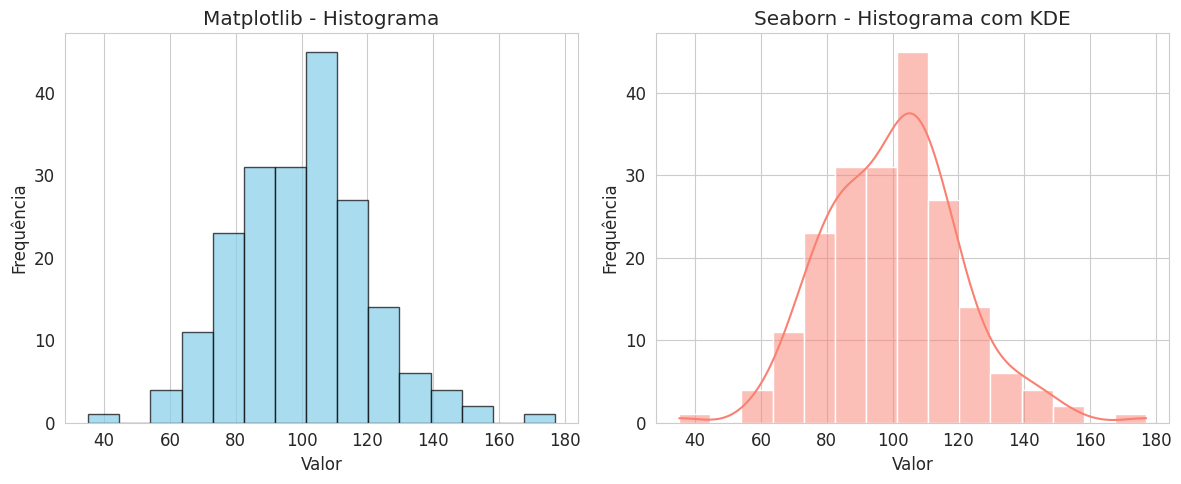

In [5]:
plt.figure(figsize=(12, 5))

# Matplotlib - Histograma
plt.subplot(1, 2, 1)
plt.hist(dados['Valor'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Matplotlib - Histograma')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(axis='y')

# Seaborn - Histograma
plt.subplot(1, 2, 2)
sns.histplot(data=dados, x='Valor', bins=15, kde=True, color='salmon')
plt.title('Seaborn - Histograma com KDE')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

**Observações:**
- Seaborn permite facilmente adicionar uma curva KDE (Kernel Density Estimation)
- Seaborn tem estilos mais atraentes por padrão
- Seaborn integra melhor com DataFrames do pandas

## 5. Boxplot (Único e Múltiplo)

<ipython-input-6-ca803a3da2c4>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dados[dados['Grupo'] == 'X']['Valor'],
<ipython-input-6-ca803a3da2c4>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo', y='Valor', data=dados, palette='pastel', showmeans=True,


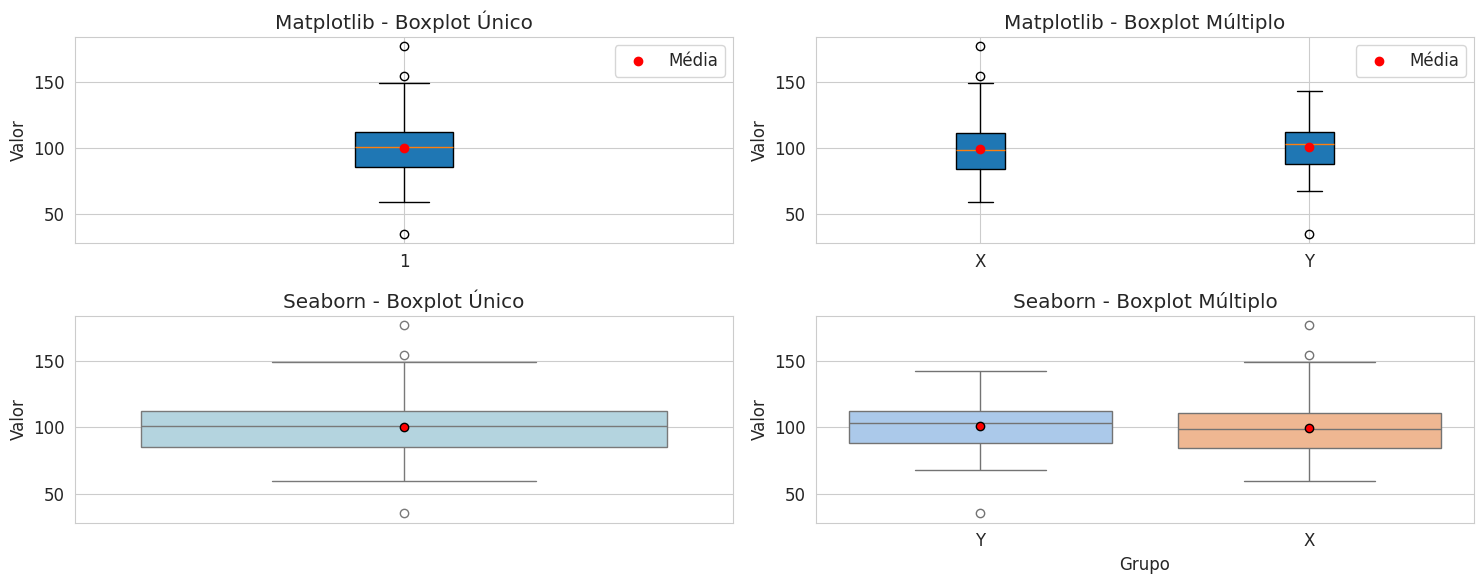

In [6]:
plt.figure(figsize=(15, 6))

# Matplotlib - Boxplot único
plt.subplot(2, 2, 1)
plt.boxplot(dados['Valor'], patch_artist=True)
plt.title('Matplotlib - Boxplot Único')
plt.ylabel('Valor')

# Adicionando média no Matplotlib
mean_val = dados['Valor'].mean()
plt.scatter(1, mean_val, color='red', label='Média', zorder=3)
plt.legend()

# Matplotlib - Boxplot múltiplo
plt.subplot(2, 2, 2)
plt.boxplot([dados[dados['Grupo'] == 'X']['Valor'],
            dados[dados['Grupo'] == 'Y']['Valor']],
           patch_artist=True, labels=['X', 'Y'])
plt.title('Matplotlib - Boxplot Múltiplo')
plt.ylabel('Valor')

# Adicionando médias
mean_x = dados[dados['Grupo'] == 'X']['Valor'].mean()
mean_y = dados[dados['Grupo'] == 'Y']['Valor'].mean()
plt.scatter([1, 2], [mean_x, mean_y], color='red', label='Média', zorder=3)
plt.legend()

# Seaborn - Boxplot único
plt.subplot(2, 2, 3)
sns.boxplot(y='Valor', data=dados, color='lightblue', showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})
plt.title('Seaborn - Boxplot Único')

# Seaborn - Boxplot múltiplo
plt.subplot(2, 2, 4)
sns.boxplot(x='Grupo', y='Valor', data=dados, palette='pastel', showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})
plt.title('Seaborn - Boxplot Múltiplo')

plt.tight_layout()
plt.show()